In [4]:
import requests
from bs4 import BeautifulSoup


def scrapetle():
    url = 'http://celestrak.com/NORAD/elements/stations.txt'
    response = requests.get(url)
    html = response.content
    soup = BeautifulSoup(html, "lxml")
    mytle=(soup.text[:168])
    lines = mytle.splitlines()
    return (lines)

[119.9155958615412, 146.13768929283899, 175.5566800859179, -160.27504706336316, -143.04793027837866, -130.12044489667386, -119.03637293044214, -107.92632575479688, -94.90820376280601, -77.49052469997815, -53.03892899966899, -23.480580149407007, 2.596088736064262, 21.40758700045687, 35.16318330015423, 46.51687015368302, 57.441460617889526, 69.74752855871739]
[-44.64057962264009, -51.09768336961923, -49.939109116561234, -41.72048592225746, -29.33170780567533, -14.970688660589918, 0.1616519146959033, 15.294837485767676, 29.650455658766898, 41.99842681015279, 50.08438382511282, 50.99922277763891, 44.30074697558069, 32.67832632915774, 18.652619953448475, 3.6325507327066564, -11.54850177790413, -26.156433115259148]


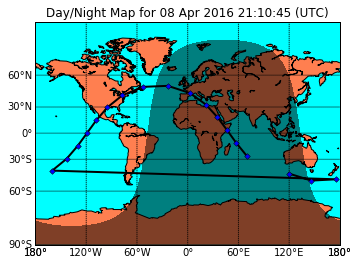

In [7]:
import math
import time
from datetime import datetime, timedelta
import ephem
import numpy as np

degrees_per_radian = 180.0 / math.pi
 
home = ephem.Observer()
home.lon = '0'   # +E
home.lat = '0'      # +N
home.elevation = 50 # meters
 
# Always get the latest ISS TLE data from:
lines=scrapetle()
# http://spaceflight.nasa.gov/realdata/sightings/SSapplications/Post/JavaSSOP/orbit/ISS/SVPOST.html
iss = ephem.readtle(lines[0], lines[1], lines[2])

npoints=18
lonarr=[0] * npoints
latarr=[0] * npoints

a=(2016, 4, 7, 9, 10, 45)
a=(2016, 4, 8, 21, 10, 45)



mydate=datetime(2016, 4, 7, 9, 10, 45)
datearr=np.array(['2016-04-07T09:10', '2002-04-10T09:10:03.172'], dtype='datetime64')

for q in range (0,2):
    for i in range(0,npoints):
        one_hour = timedelta(hours=1)
        min15 = timedelta(minutes=5)
        mydate=datetime.utcnow()
        #mydate=datearr[q]
        mydate=datetime(a[0], a[1], a[2], a[3], a[4], a[5])
        home.date = mydate +i*min15
        iss.compute(home)
        dist=2
        lonarr[i]=iss.sublong* degrees_per_radian
        latarr[i]=iss.sublat* degrees_per_radian
        #if ( (iss.alt < dist) and (iss.az < dist)):
        #    print (home.date)
        #    print('iss: altitude %4.1f deg, azimuth %5.1f deg' % (iss.alt * degrees_per_radian, iss.az * degrees_per_radian))
 
print (lonarr)
print (latarr)


%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from datetime import datetime
# miller projection
map = Basemap(projection='mill',lon_0=0)
# plot coastlines, draw label meridians and parallels.
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
# shade the night areas, with alpha transparency so the
# map shows through. Use current time in UTC.
date = mydate
CS=map.nightshade(date)

x, y = map(lonarr, latarr) # forgot this line 
map.plot(x, y, 'D-', markersize=4, linewidth=2, color='k', markerfacecolor='b') 
plt.title('Day/Night Map for %s (UTC)' % date.strftime("%d %b %Y %H:%M:%S"))
plt.show()


In [28]:
print datearr

['2016-04-07T09:10:00.000+0200' '2002-04-10T09:10:03.172+0200']


In [16]:
print datetime(2016, 4, 7, 9, 10, 45)


2016-04-07 09:10:45


In [17]:
a=(2016, 4, 7, 9, 10, 45)


In [18]:
print a

(2016, 4, 7, 9, 10, 45)


In [21]:
print datetime(a[0], a[1], a[2], a[3], a[4], a[5])

2016-04-07 09:10:45
